In [7]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

import json
import folium

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [12]:
bicycle = pd.read_csv('data/공공자전거 대여소별 이용량_2017년.csv',encoding='CP949',parse_dates=['대여일자'])
bicycle.head()

,대여일자,대여시간,대여소ID,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,대여소_구
0,2017-01-01,0,315.0,신한은행안국역지점옆,정기,F,20대,1,47.32,0.55,2390,15,종로구
1,2017-01-01,0,315.0,신한은행안국역지점옆,정기,M,20대,1,71.58,0.56,2410,16,종로구
2,2017-01-01,2,315.0,신한은행안국역지점옆,일일(회원),F,20대,1,60.94,0.63,2700,14,종로구
3,2017-01-01,12,315.0,신한은행안국역지점옆,정기,F,30대,1,21.83,0.25,1060,6,종로구
4,2017-01-01,13,315.0,신한은행안국역지점옆,정기,M,30대,1,14.67,0.13,570,2,종로구


In [41]:
bicycle2018 = pd.read_csv('data/공공자전거 대여소별 이용량_2018년.csv',encoding='CP949',parse_dates=['대여일자'])
bicycle2018.head()

,대여일자,대여시간,대여소ID,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,대여소_구
0,2018-01-01,0.0,300.0,정동사거리,정기권,F,~10대,1.0,37.32,0.34,1450.0,23.0,중구
1,2018-01-01,17.0,300.0,정동사거리,정기권,M,40대,1.0,82.61,0.69,2980.0,39.0,중구
2,2018-01-01,18.0,300.0,정동사거리,정기권,M,40대,1.0,22.10,0.21,900.0,2.0,중구
3,2018-01-01,22.0,300.0,정동사거리,정기권,F,30대,1.0,139.00,1.25,5400.0,27.0,중구
4,2018-01-02,6.0,300.0,정동사거리,정기권,M,30대,1.0,26.43,0.21,890.0,3.0,중구


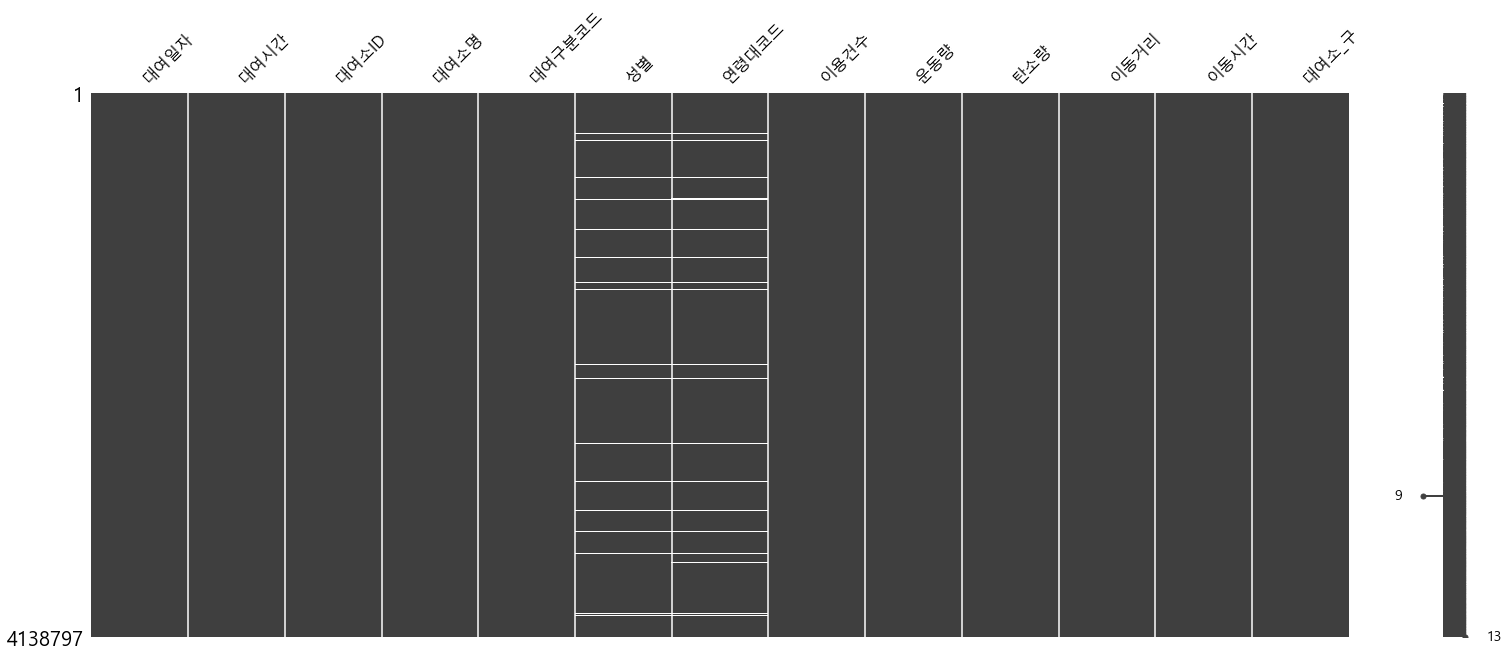

In [8]:
msno.matrix(bicycle) #결측치 확인
plt.show()

In [42]:
msno.matrix(bicycle2018) #결측치 확인
plt.show()

MemoryError: Unable to allocate 3.35 GiB for an array with shape (8636262, 13, 4) and data type float64

<Figure size 1800x720 with 2 Axes>

In [9]:
#확인해보니 결측 아님
bicycle.isnull()

,대여일자,대여시간,대여소ID,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,대여소_구
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138792,False,False,False,False,False,False,False,False,False,False,False,False,False
4138793,False,False,False,False,False,False,False,False,False,False,False,False,False
4138794,False,False,False,False,False,False,False,False,False,False,False,False,False
4138795,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4138797 entries, 0 to 4138796
Data columns (total 13 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int64         
 2   대여소ID   float64       
 3   대여소명    object        
 4   대여구분코드  object        
 5   성별      object        
 6   연령대코드   object        
 7   이용건수    int64         
 8   운동량     float64       
 9   탄소량     float64       
 10  이동거리    int64         
 11  이동시간    int64         
 12  대여소_구   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 410.5+ MB


In [15]:
bicycle['년'] = bicycle['대여일자'].dt.year
bicycle['월'] = bicycle['대여일자'].dt.month
bicycle['일'] = bicycle['대여일자'].dt.day

In [18]:
bicycle['대여소_구'].unique()

array(['종로구', '서대문구', '용산구', '은평구', '마포구', '양천구', '영등포구', '중구', '동대문구',
       '성동구', '광진구', '합계', '강동구', '강서구', '송파구', '중랑구', '성북구', '강북구',
       '노원구', '도봉구', '금천구', '구로구', '관악구', '동작구', '서초구', '강남구'],
      dtype=object)

In [43]:
bicycle2018['대여소_구'].unique()

array(['중구', '광진구', '강북구', '종로구', '마포구', '영등포구', '용산구', '중랑구', '강남구',
       '구로구', '송파구', '관악구', '서대문구', '서초구', '양천구', '은평구', '강서구', '동대문구',
       '노원구', '성동구', '강동구', '동작구', '성북구', '도봉구', '금천구', '합계'],
      dtype=object)

In [19]:
bicycle['대여소_구'] = bicycle['대여소_구'].astype('category')
bicycle['대여소명'] = bicycle['대여소명'].astype('category')
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4138797 entries, 0 to 4138796
Data columns (total 16 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int64         
 2   대여소ID   float64       
 3   대여소명    category      
 4   대여구분코드  object        
 5   성별      object        
 6   연령대코드   object        
 7   이용건수    int64         
 8   운동량     float64       
 9   탄소량     float64       
 10  이동거리    int64         
 11  이동시간    int64         
 12  대여소_구   category      
 13  년       int64         
 14  월       int64         
 15  일       int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 454.0+ MB


In [27]:
df = bicycle.groupby(['대여소_구'])[['이용건수']].agg('sum')
df=df.drop(['합계'])
df

,이용건수
대여소_구,
강남구,127593
강동구,78262
강북구,31028
강서구,108820
관악구,102364
광진구,291120
구로구,80879
금천구,33725
노원구,88320


In [44]:
df2018 = bicycle2018.groupby(['대여소_구'])[['이용건수']].agg('sum')
df2018=df2018.drop(['합계'])
df2018

,이용건수
대여소_구,
강남구,307070.0
강동구,235732.0
강북구,122882.0
강서구,270502.0
관악구,257553.0
광진구,469534.0
구로구,245890.0
금천구,97534.0
노원구,307169.0


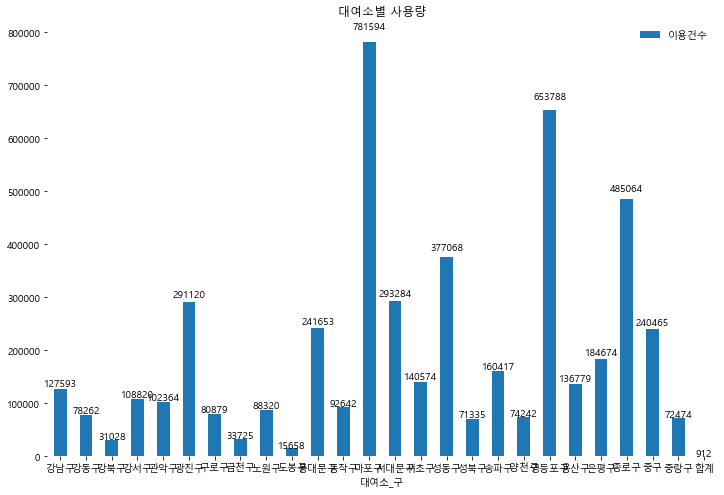

In [21]:
df = bicycle.groupby(['대여소_구'])[['이용건수']].agg('sum')
ax=df.plot(kind='bar', figsize=(12, 8), rot=0, title="대여소별 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

In [25]:
pvt_num_rental = df.pivot_table(index=['대여소_구'], values='이용건수', aggfunc='nunique').fillna(0)
pvt_num_rental.head()

,이용건수
대여소_구,
강남구,1
강동구,1
강북구,1
강서구,1
관악구,1


In [29]:
accident = pd.read_csv('data/자전거사고다발지역정보.csv', encoding = 'CP949')
accident.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [30]:
accident_seoul = accident.loc[accident['시도시군구명'].str.contains('서울특별시')]
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [31]:
accident_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  1018 non-null   object 
 1   사고다발지ID   1018 non-null   int64  
 2   법정동코드     1018 non-null   int64  
 3   지점코드      1018 non-null   int64  
 4   시도시군구명    1018 non-null   object 
 5   지점명       1018 non-null   object 
 6   발생건수      1018 non-null   int64  
 7   사상자수      1018 non-null   int64  
 8   사망자수      1018 non-null   int64  
 9   중상자수      1018 non-null   int64  
 10  경상자수      1018 non-null   int64  
 11  부상신고자수    1018 non-null   int64  
 12  경도        1018 non-null   float64
 13  위도        1018 non-null   float64
 14  다발지역폴리곤   1018 non-null   object 
dtypes: float64(2), int64(9), object(4)
memory usage: 127.2+ KB


In [32]:
accident_seoul['지역구']=accident['지점명'].str.split(" ").str[1]
accident_seoul=accident_seoul.drop(['다발지역폴리곤'], axis='columns')
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,지역구
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,종로구
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,종로구
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,종로구
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,중구
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,용산구


In [33]:
accident_seoul_gu = accident_seoul.groupby('지역구').size()
accident_seoul_gu

지역구
강남구      18
강동구      55
강북구      34
강서구      31
관악구      25
광진구      53
구로구      49
금천구      20
노원구      47
도봉구      34
동대문구     91
동작구      28
마포구      26
서대문구      8
서초구      11
성동구      36
성북구      25
송파구     154
양천구      53
영등포구     94
용산구      13
은평구      39
종로구       9
중구        3
중랑구      62
dtype: int64

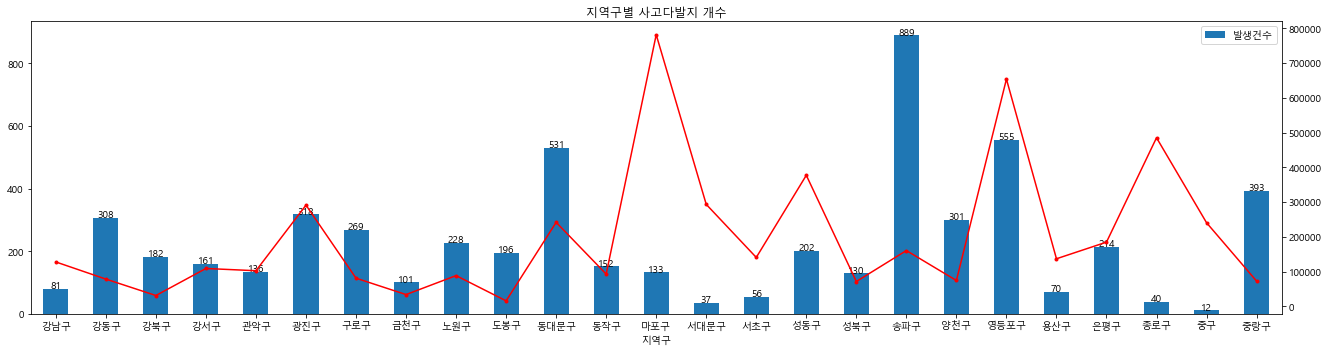

In [37]:
accident_seoul_gu = accident_seoul.groupby(['지역구'])[['발생건수']].agg('sum')

ax = accident_seoul_gu.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 사고다발지 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.tight_layout()

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(df, 'r.-')
plt.show()

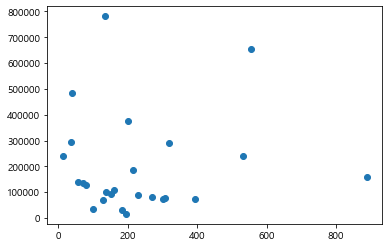

In [38]:
plt.scatter(accident_seoul_gu["발생건수"], df["이용건수"])
plt.show()

In [39]:
np.cov(accident_seoul_gu["발생건수"], df["이용건수"])

array([[3.90220833e+04, 2.49607548e+06],
       [2.49607548e+06, 3.75564801e+10]])

In [40]:
accident_seoul_gu["발생건수"].corr(df["이용건수"])

0.0652018691910008

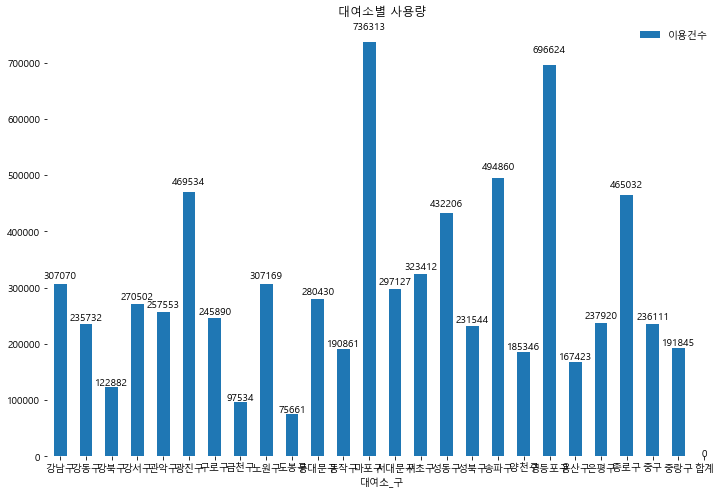

In [45]:
df2018 = bicycle2018.groupby(['대여소_구'])[['이용건수']].agg('sum')
ax=df2018.plot(kind='bar', figsize=(12, 8), rot=0, title="대여소별 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

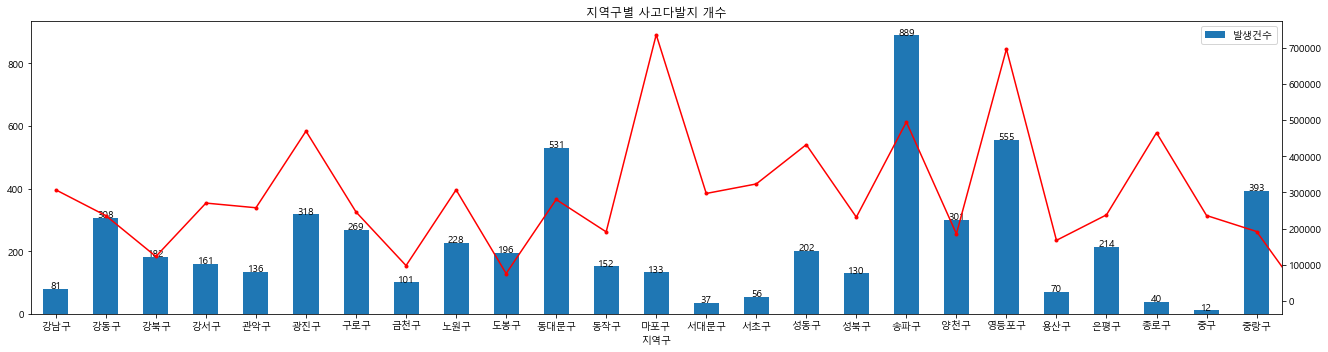

In [46]:
accident_seoul_gu = accident_seoul.groupby(['지역구'])[['발생건수']].agg('sum')

ax = accident_seoul_gu.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 사고다발지 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.tight_layout()

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(df2018, 'r.-')
plt.show()

In [47]:
accident_seoul_gu["발생건수"].corr(df2018["이용건수"])

0.3198788160510384